In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
df=pd.read_csv(r'C:\Users\Vimal\Desktop\DAS\week7\Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [4]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

# 1.Relationship between the amount spent for advertising through five different companies and profit generated.

In [5]:
df.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

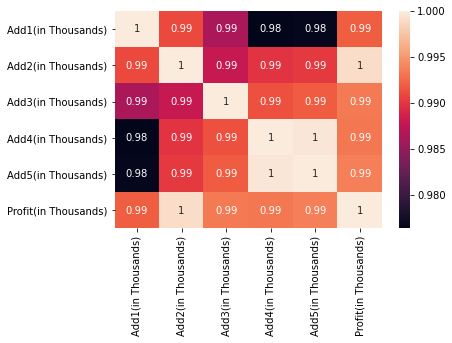

In [6]:
sns.heatmap(df.corr(),annot=True)

<Figure size 720x576 with 0 Axes>

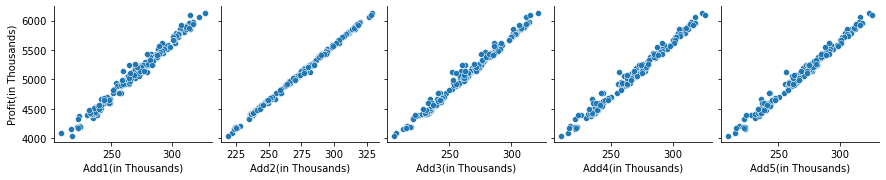

In [7]:
plt.figure(figsize=(10,8))
sns.pairplot(df, x_vars=["Add1(in Thousands)","Add2(in Thousands)","Add3(in Thousands)","Add4(in Thousands)",
                         "Add5(in Thousands)"],y_vars="Profit(in Thousands)")
plt.show()

  Heat map and the scaterd plot clearly shows there is a strong positive correlation between profit and adds

# 2 . A regression model to predict the profit

In [8]:
y=df["Profit(in Thousands)"]
x=df.drop(["Profit(in Thousands)","Date"], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.7)

In [10]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [11]:
prediction=model.predict(x_test)
prediction

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457, 4887.296, 5805.521,
       4705.198, 4404.686, 5465.277, 4947.72 , 5185.639, 5225.14 ,
       5111.806, 5518.561])

In [12]:
data_com=pd.DataFrame(data={"Actual Value":y_test,"Predicted value":prediction})
data_com

,Actual Value,Predicted value
15,4152.066,4152.066
9,4446.441,4446.441
100,5131.898,5131.898
132,4907.560,4907.560
68,5004.282,5004.282
...,...,...
56,4947.720,4947.720
128,5185.639,5185.639
76,5225.140,5225.140
144,5111.806,5111.806


From the table we can see that the actual value are very close to predected one

In [13]:
from sklearn.metrics import r2_score
r2Score = r2_score(prediction, y_test)
r2Score

1.0

In [14]:
from sklearn.metrics import mean_squared_error
print("Mean squared error is:",mean_squared_error(y_test,prediction))

Mean squared error is: 3.428797055260131e-24


Here Mean squared error is  3.42 and r2Score is 1 which shows its a good model

# 3.Predict the profit generated by the company

In [15]:
profit_prd={'Add1':[290],'Add2':[312],'Add3':[309],'Add4':[298],'Add5':[320]}
profit_prd=pd.DataFrame(profit_prd)
profit_prd
prediction2=model.predict(profit_prd)
print("The predicted value is",prediction2[0])

The predicted value is 5820.059999999999
